In [4]:
# importing the required libraries
import pandas as pd
import numpy as np
import boto3
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')


In [ ]:
# Load the .env file to access the environment variables
from dotenv import load_dotenv
load_dotenv()

AWS_ACCESS_KEY_ID = os.getenv('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.getenv('AWS_SECRET_ACCESS_KEY')
REGION_NAME = os.getenv('REGION_NAME')


#### Downloading the data from AWS S3 bucket

In [5]:
# defining a function to get data from aws s3
def get_data_from_s3(path):
    
    # Configure boto3 to use your AWS credentials
    session = boto3.Session(
        aws_access_key_id=AWS_ACCESS_KEY_ID,
        aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
        region_name=REGION_NAME
    )
    
    # Create an S3 client
    s3 = session.client('s3')
    
    # Specify the bucket name and the object key (file name)
    bucket_name = 'search-relevancy'
    file_name = 'raw.csv'
    
    # Download the file
    s3.download_file(bucket_name, file_name,path)
    
    print(f"{file_name} has been downloaded from bucket {bucket_name} and saved as raw.csv")

In [6]:
# calling the function to downloading data
get_data_from_s3(path='../data/raw.csv')

raw.csv has been downloaded from bucket search-relevancy and saved as raw.csv


#### Exploratory Data Analysis

In [2]:
# importing the data
df = pd.read_csv("../data/raw.csv")

In [3]:
df.head()

,article_id,article_id.1,category,subcategory,title,published date,text,source
0,0,0,asia media,asia - business & finance,EY achieves highest growth in nearly two decad...,2022-09-21 07:00:00,"US$3.2b invested in audit quality, innovation,...","{'href': 'https://www.ey.com', 'title': 'Ernst..."
1,1,1,asia media,asia - business & finance,Illuminate Financial Announces Strategic Partn...,2022-11-29 08:00:00,"LONDON, Nov. 29, 2022 /PRNewswire/ -- Illumina...","{'href': 'https://finance.yahoo.com', 'title':..."
2,2,2,asia media,asia - business & finance,Philip Morris International Announces New Regi...,2022-11-25 08:00:00,"LAUSANNE, Switzerland, November 25, 2022--(BUS...","{'href': 'https://finance.yahoo.com', 'title':..."
3,3,3,asia media,asia - business & finance,18 Thailand Companies and Entrepreneurs Win Co...,2022-07-02 07:00:00,"SINGAPORE, July 2, 2022 /PRNewswire/ -- Mr. Wi...","{'href': 'https://finance.yahoo.com', 'title':..."
4,4,4,asia media,asia - business & finance,"Meihua International Medical Technologies Co.,...",2022-12-05 08:00:00,"YANGZHOU, China, Dec. 5, 2022 /PRNewswire/ -- ...","{'href': 'https://finance.yahoo.com', 'title':..."


In [4]:
# checking the shape of the dataframe
df.shape

(13322, 8)

In [5]:
# basic sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13322 entries, 0 to 13321
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   article_id      13322 non-null  int64 
 1   article_id.1    13322 non-null  int64 
 2   category        13322 non-null  object
 3   subcategory     13322 non-null  object
 4   title           13322 non-null  object
 5   published date  13322 non-null  object
 6   text            13322 non-null  object
 7   source          13322 non-null  object
dtypes: int64(2), object(6)
memory usage: 832.8+ KB


In [6]:
# removing the unwanted column
df.drop(columns=['article_id.1'],inplace=True)

# making the date as datetime dtype
df['published date'] = pd.to_datetime(df['published date'])


No Null Values in our dataset

In [13]:

# filtering the rows where title or text is null
filtering = (df['title'].isnull()) | (df['text'].isnull())
filtered_df = df[~filtering]

n_articles = filtered_df.shape[0]

section_by = 

In [20]:
(df[['article_id','title']].values).shape

(13322, 2)

In [42]:
df.describe(include=['int64', 'object','datetime64'])

,article_id,category,subcategory,title,published date,text,source
count,13322.000000,13322,13322,13322,13322,13322,13322
unique,NaN,13,271,13031,NaN,13077,2103
top,NaN,trade & professional,mapping & geospatial industry,6m people set to receive £150 disability cost-...,NaN,Use one of the services below to sign in to PB...,"{'href': 'https://www.fool.com', 'title': 'The..."
freq,NaN,2063,98,6,NaN,60,1901
mean,6660.500000,NaN,NaN,NaN,2022-06-09 07:03:12.370064384,NaN,NaN
min,0.000000,NaN,NaN,NaN,2001-05-03 07:00:00,NaN,NaN
25%,3330.250000,NaN,NaN,NaN,2022-06-30 07:00:00,NaN,NaN
50%,6660.500000,NaN,NaN,NaN,2022-09-27 07:00:00,NaN,NaN
75%,9990.750000,NaN,NaN,NaN,2022-11-15 08:00:00,NaN,NaN
max,13321.000000,NaN,NaN,NaN,2023-01-13 10:44:46,NaN,NaN


There are no duplicates in our dataframe

### Univariate Analysis

#### 1. Category

In [45]:
# checking the list of categories
df.category.unique().tolist()

['asia media',
 'business, finance & economics',
 'computers, science & technology',
 'entertainment, art & culture',
 'general news & current affairs',
 'health & medicine',
 'lifestyle',
 'multicultural press',
 'new zealand',
 'sport & leisure',
 'trade & professional',
 'uk media',
 'us media']

C:\Users\prady\AppData\Local\Temp\ipykernel_7500\3554443964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df,palette='colorblind')


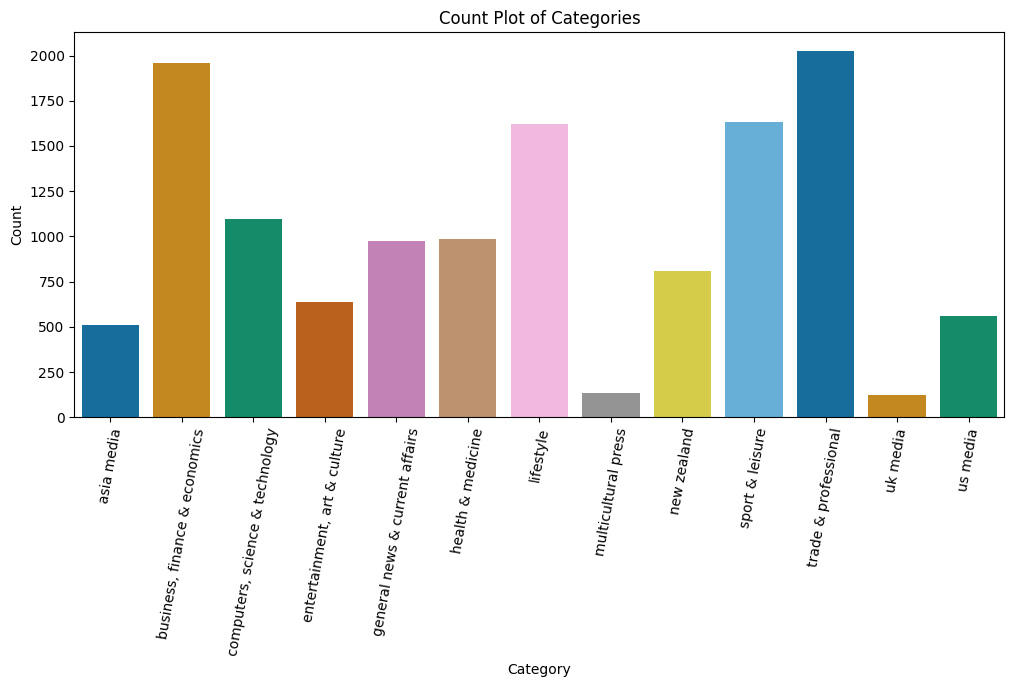

In [63]:
# Create a count plot
plt.figure(figsize=(12, 5))  # Set the figure size
sns.countplot(x='category', data=df,palette='colorblind')

# Add title and labels
plt.title('Count Plot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=80)


# Show the plot
plt.show()

We have totally 13 Categories

#### 2. Subcategories

In [72]:
top_10_subcategories = df.subcategory.value_counts()[:10].reset_index()
top_10_subcategories

,subcategory,count
0,mapping & geospatial industry,98
1,"asia - health, medicine, pharmacy industry",90
2,asia - business & finance,90
3,"india - marketing, advertising trade",89
4,solar energy industry,88
5,books & literature,88
6,celebrity gossip & social,88
7,advertising & marketing,85
8,aviation & aerospace,85
9,"electronics, robotics & automation",85


#### Taking a sample datapoint

In [78]:
print(df.title[0],'\n')
print(df.text[0],'\n')


EY achieves highest growth in nearly two decades, reports record global revenue of US$45.4b 

US$3.2b invested in audit quality, innovation, technology and people in FY22 – part of a US$10b three-year commitment announced in FY21

More than 81m lives positively impacted through corporate responsibility program EY Ripples

Carbon negative status reached in FY21, on track to achieve net-zero ambition in 2025

Looking ahead, EY leaders have reached the decision to move forward with partner votes for the initiative to separate into two distinct, multidisciplinary organizations

EY today announces combined global revenues of US$45.4b for the financial year ending June 2022 (FY22), an increase of 16.4% in local currency (13.7% in US dollars). This marks one of the most successful years in the history of the organization with the highest growth seen in nearly two decades attributed to the EY NextWave strategy to deliver long-term value for EY people, clients and society.

EY has today also pu